# Implementation of Simple Linear Regression from Scratch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("CarPrice.csv")

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.shape

(205, 26)

In [6]:
df_num = df.select_dtypes(include=['number'])

<Axes: >

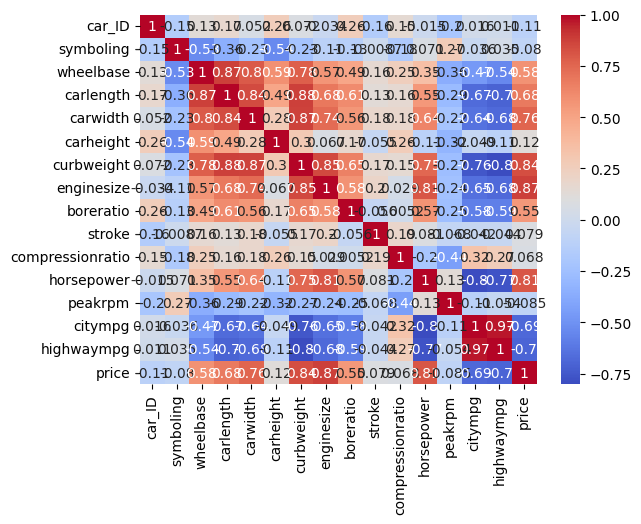

In [7]:
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', )

In [8]:
X = df['enginesize'].values
y = df['price'].values

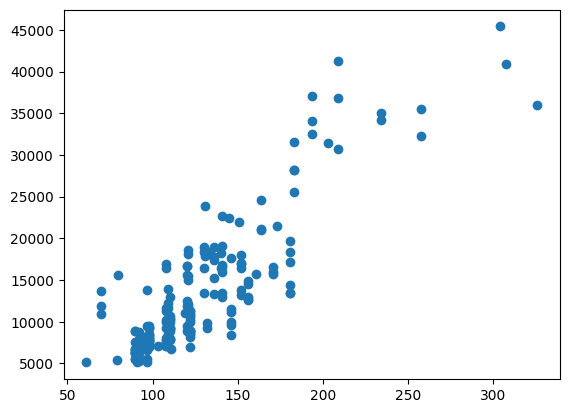

In [9]:
plt.scatter(X, y)

In [10]:
mu = X.mean()
print(mu)
std = X.std()
print(std)

126.90731707317073
41.54100172732021


In [11]:
X_std = (X - mu)/std

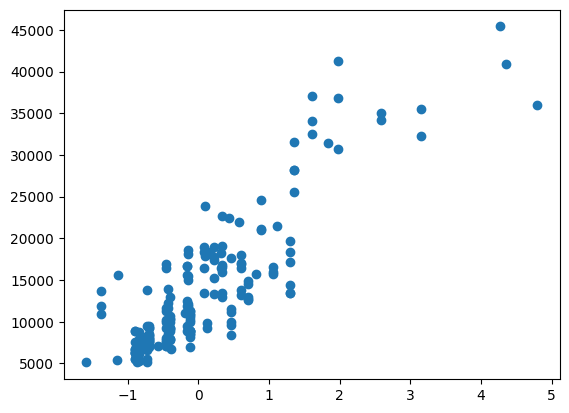

In [12]:
plt.scatter(X_std, y)

In [13]:
def hypothesis(X, theta):
    theta0 = theta[0]
    theta1 = theta[1]
    y_hat = theta0 + theta1*X
    return y_hat

In [14]:
def error(X, y, theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_hat_i = hypothesis(X[i], theta)
        total_error += (y_hat_i - y[i])**2
    return total_error/(2*m)

In [15]:
def gradient(X, y, theta):
    m = X.shape[0]
    grad = np.zeros((2,))

    for i in range(m):
        y_hat_i = hypothesis(X[i], theta)
        grad[0] += (y_hat_i - y[i])
        grad[1] += (y_hat_i - y[i])*X[i]

    return grad/m

In [16]:
def gradient_descent(X, y, max_itr=20, learning_rate=0.1):
    theta = np.zeros((2,))
    error_list = []
    for i in range(max_itr):
        grad = gradient(X, y, theta)
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]

        e = error(X, y, theta)
        error_list.append(e)
    return theta, error_list

In [17]:
optimal_theta, error_list = gradient_descent(X_std, y, max_itr=40)

In [18]:
X_test = np.arange(-2, 6, 1)

In [19]:
Y_pred = optimal_theta[0] + optimal_theta[1]*X_test

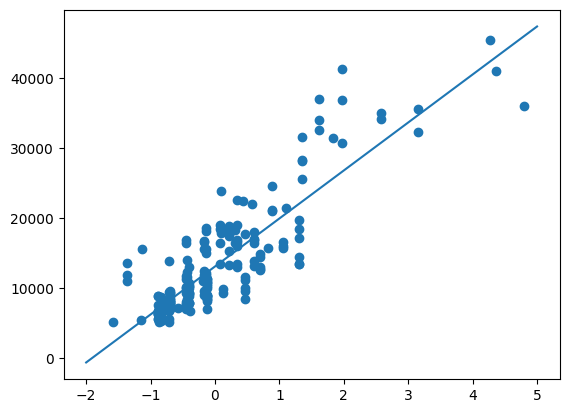

In [20]:
plt.scatter(X_std, y)
plt.plot(X_test, Y_pred)
plt.show()

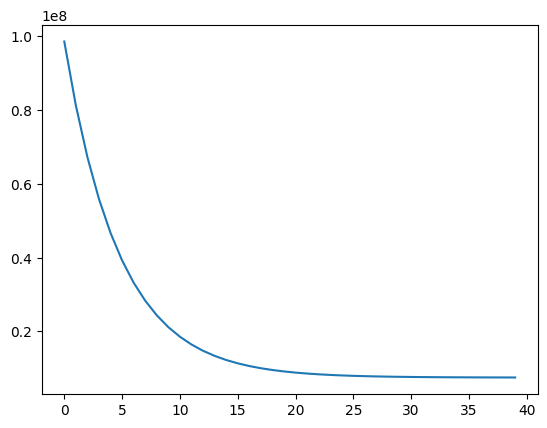

In [21]:
plt.plot(error_list)